## Data Collection

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")

df.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0         372.0                 5.0  2023-12-23 15:21:39.134960   
1         12.0         694.0                 2.0  2023-06-12 15:21:39.111551   
2         14.0           NaN                 3.0  2023-09-30 15:21:39.221386   
3          0.0         367.0                 1.0  2024-06-12 15:21:39.226954   
4          8.0         598.0                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

In [ ]:
df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

## EDA

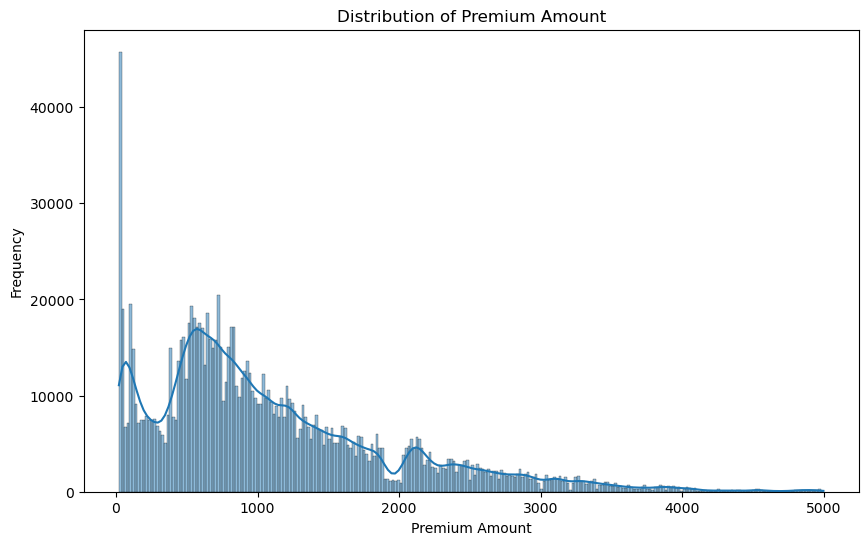

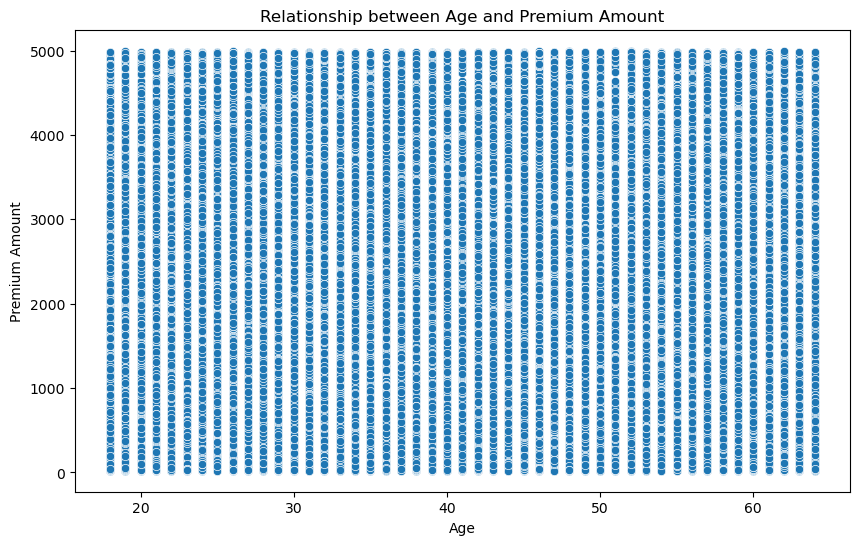

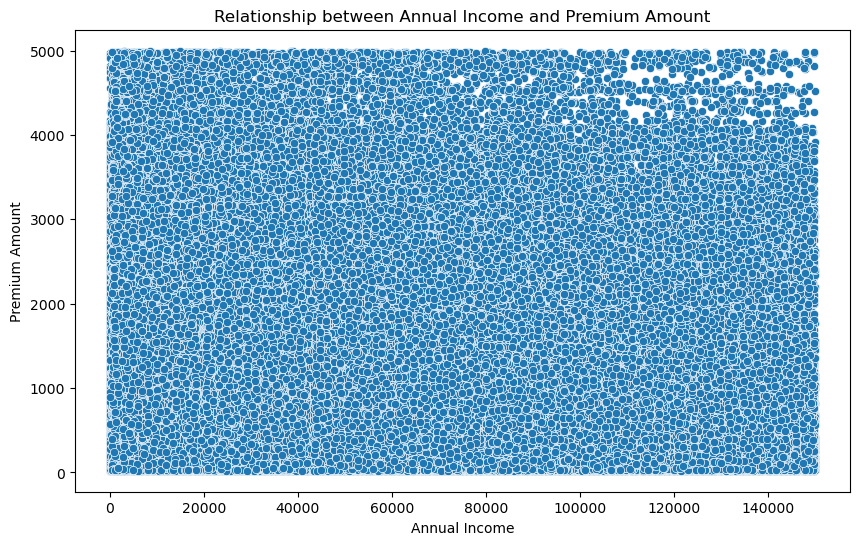

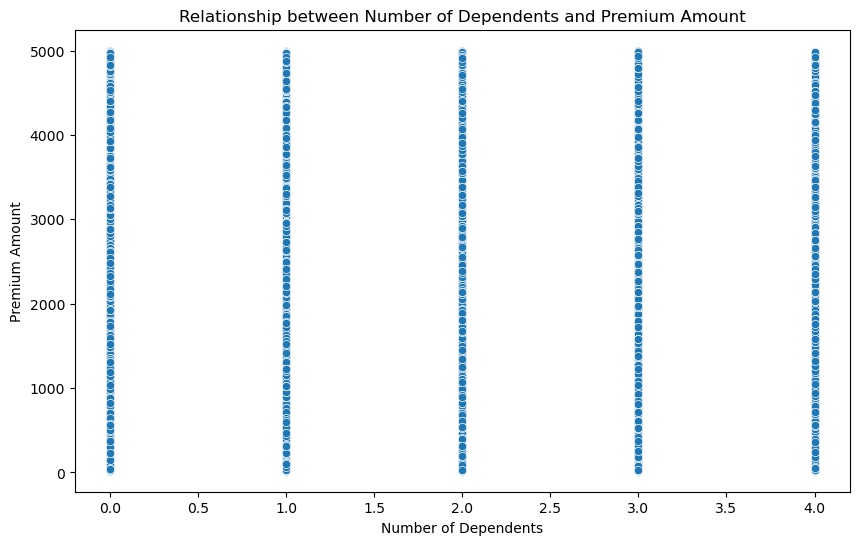

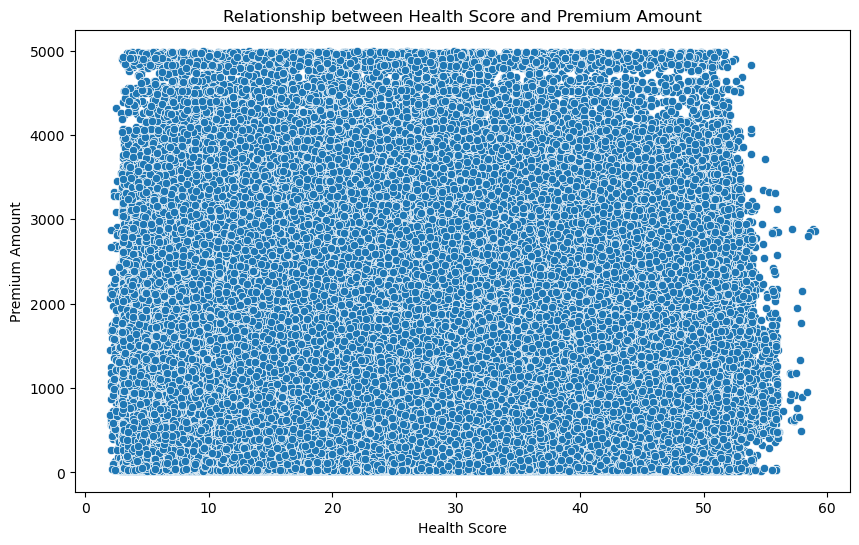

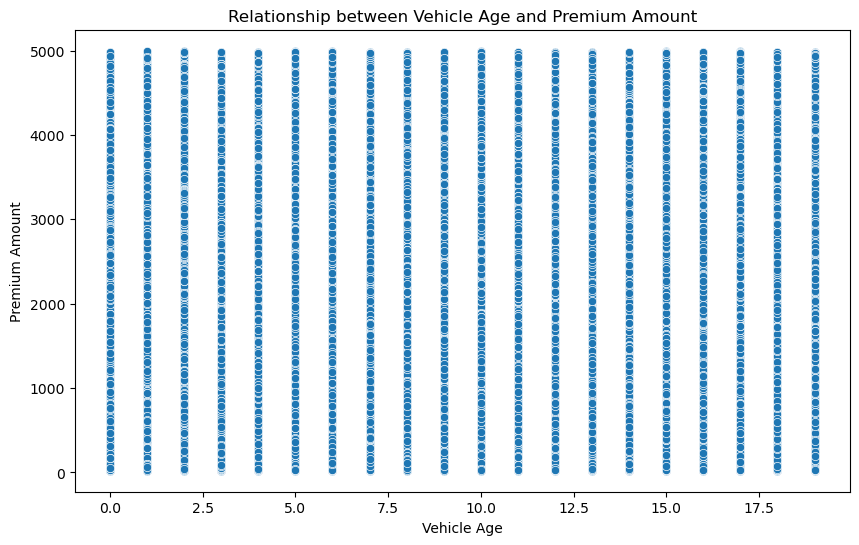

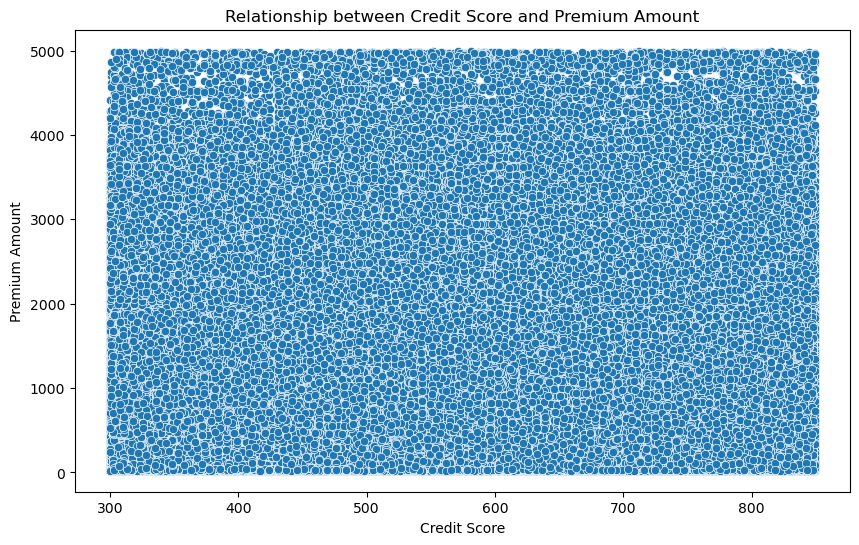

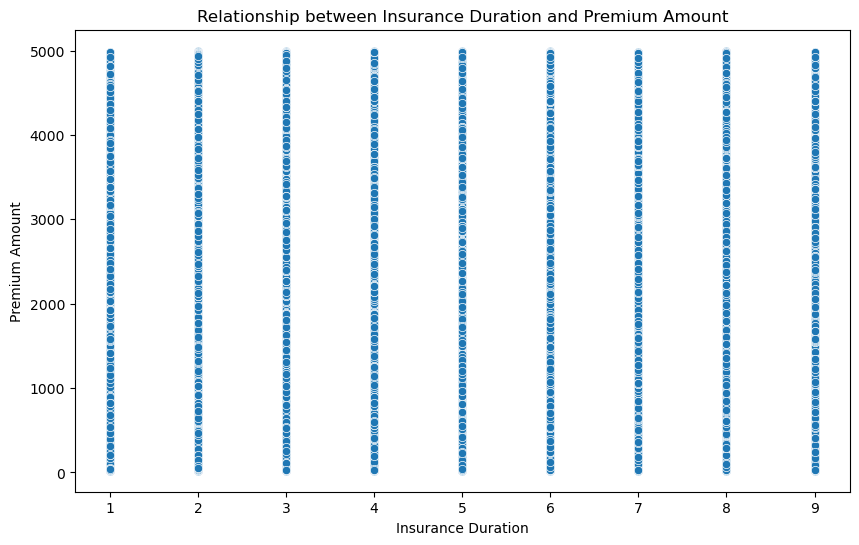

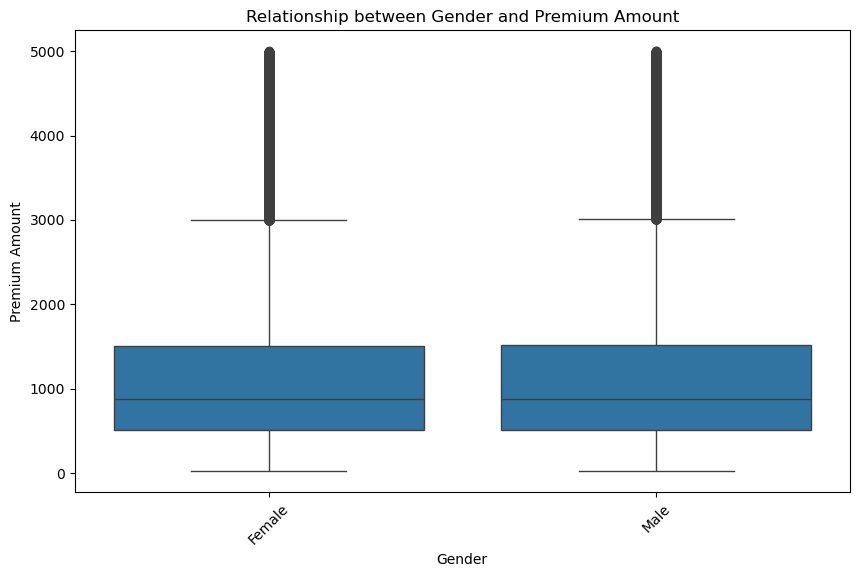

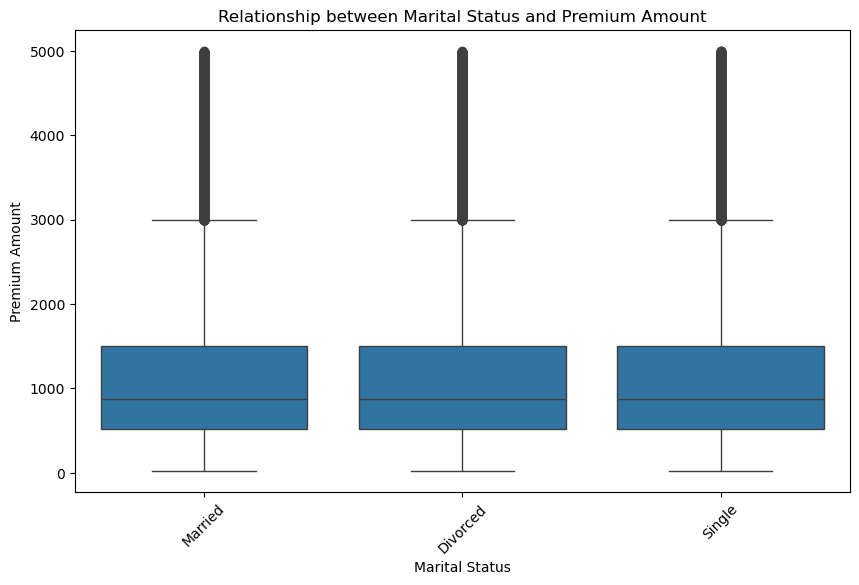

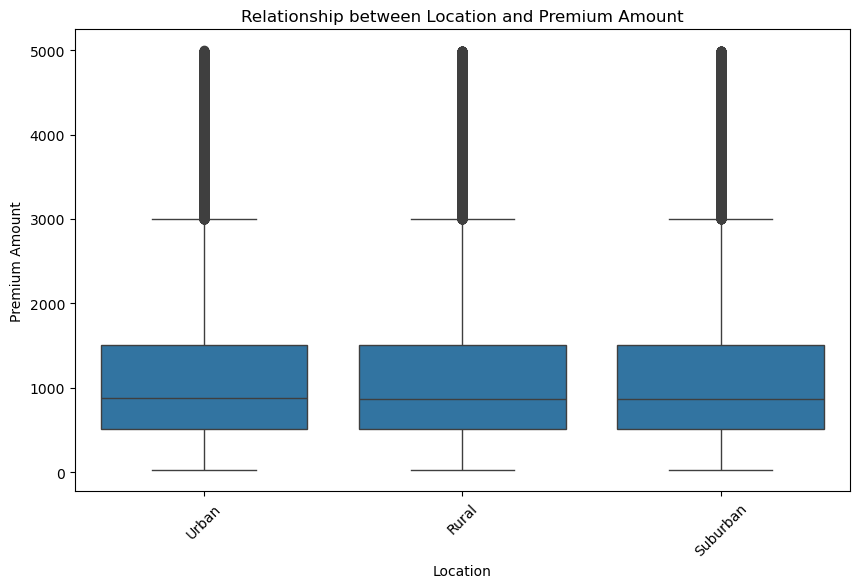

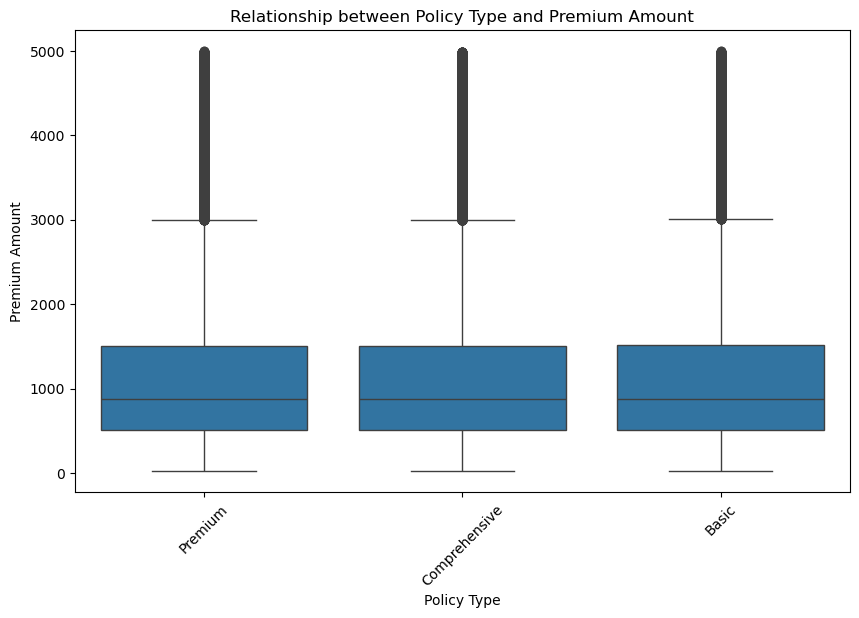

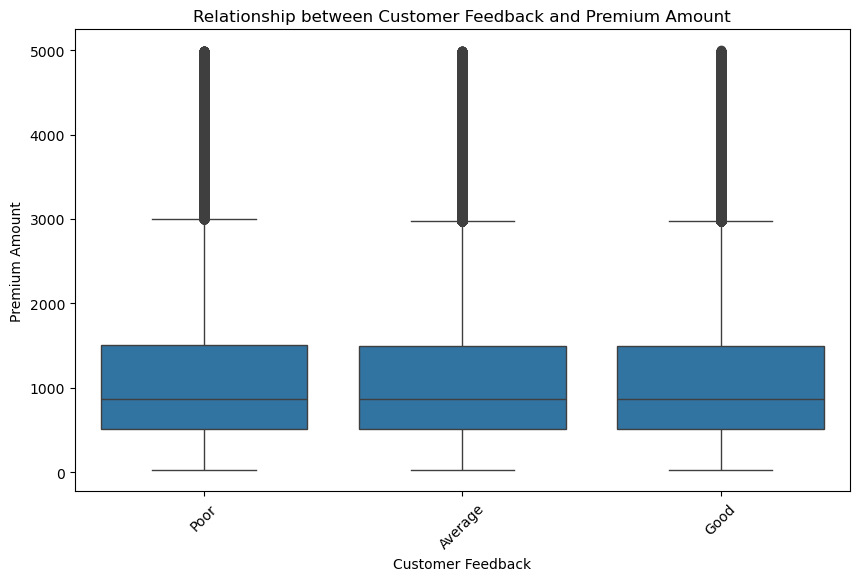

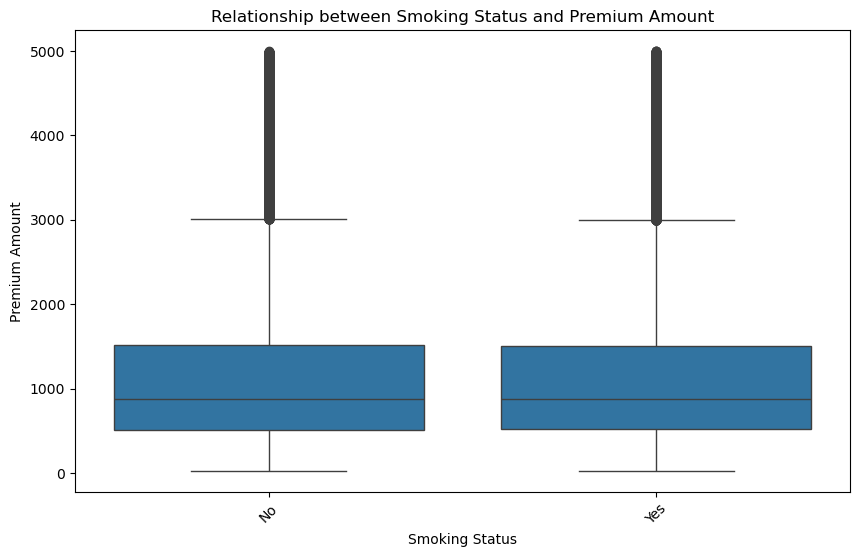

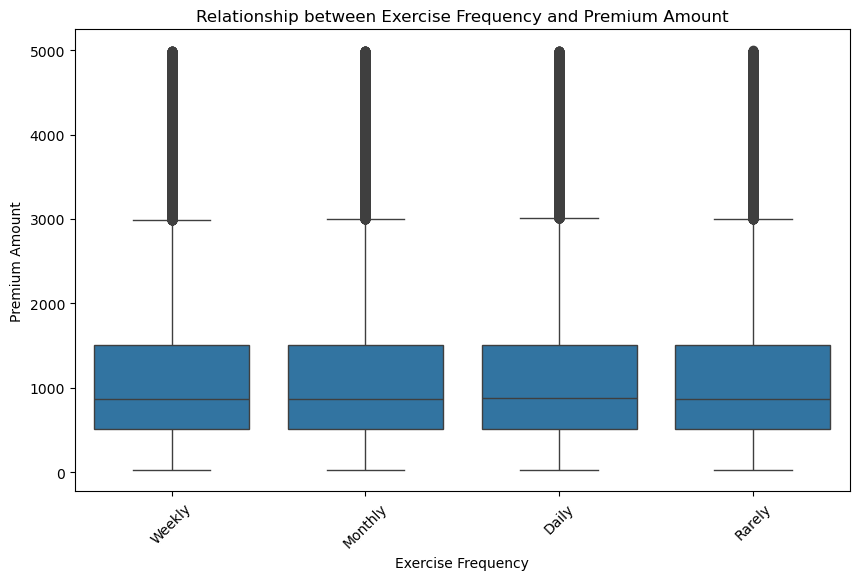

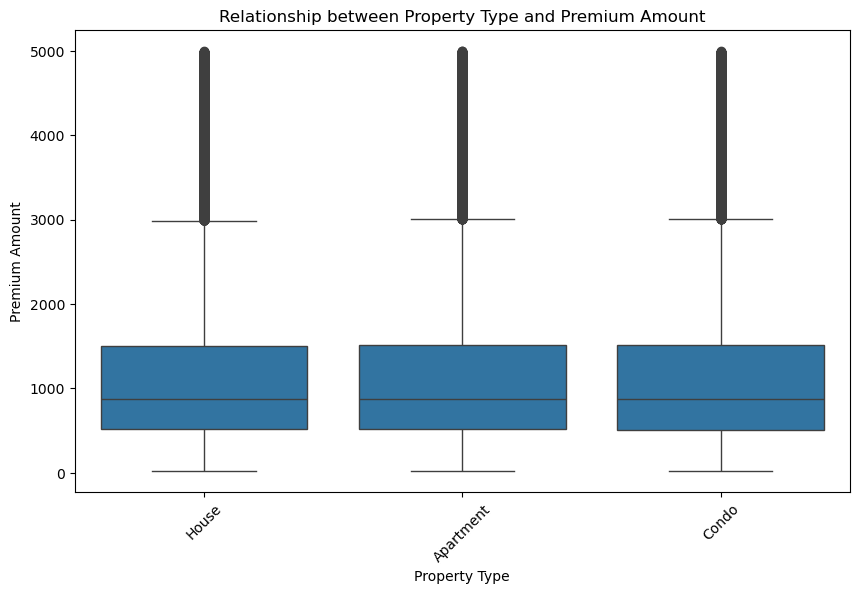

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Premium Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Premium Amount'], kde=True)
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.show()

# Relationship between Premium Amount and other numerical features
numeric_features = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['Premium Amount'])
    plt.title(f'Relationship between {feature} and Premium Amount')
    plt.xlabel(feature)
    plt.ylabel('Premium Amount')
    plt.show()

# Relationship between Premium Amount and categorical features
categorical_features = ['Gender', 'Marital Status', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], y=df['Premium Amount'])
    plt.title(f'Relationship between {feature} and Premium Amount')
    plt.xlabel(feature)
    plt.ylabel('Premium Amount')
    plt.xticks(rotation=45)
    plt.show()

## Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')


class DataPreprocessor:
    def __init__(self):
        self.label_encoders = {}
        self.one_hot_encoder = OneHotEncoder(sparse_output=False)
        

    def preprocess_data(self, df):
        
        numerical_cols = [
            'Age', 'Annual Income', 'Health Score', 
            'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims'
        ]
        
        categorical_cols = [
            'Marital Status', 'Number of Dependents', 'Occupation', 'Customer Feedback'
        ]
        
        # Fill missing numerical values with mean
        for col in numerical_cols:
            df[col].fillna(df[col].mean(), inplace=True)
        
        # Fill missing categorical values with mode
        for col in categorical_cols:
            df[col].fillna(df[col].mode()[0], inplace=True)
        
        # Define categorical mappings
        mappings = {
            "Education Level": {
                "High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3
            },
            "Customer Feedback": {
                'Poor': 0, 'Average': 1, 'Good': 2
            },
            "Exercise Frequency": {
                'Rarely': 0, 'Weekly': 1, 'Monthly': 2, 'Daily': 3
            },
        }
        
        # Apply categorical mappings
        for col, mapping in mappings.items():
            df[col] = df[col].map(mapping)

        return df

    def label_encode(self, df, columns):
        for col in columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            self.label_encoders[col] = le
        return df

    def one_hot_encode(self, df, columns):
        one_hot_encoded = self.one_hot_encoder.fit_transform(df[columns])
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=self.one_hot_encoder.get_feature_names_out(columns))
        df = pd.concat([df, one_hot_df], axis=1)
        df = df.drop(columns, axis=1)
        return df
    

# Load the data
df = pd.read_csv('train.csv')

# Initialize the preprocessor
preprocessor = DataPreprocessor()

# Preprocess the data
df = preprocessor.preprocess_data(df)
df.drop(['id', 'Policy Start Date'], axis=1, inplace=True)
df = preprocessor.label_encode(df, ['Gender', 'Smoking Status', 'Marital Status', 'Policy Type'])
df_encoded = preprocessor.one_hot_encode(df, df.select_dtypes(include=['object']).columns.tolist())


In [5]:
df_encoded.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0  19.0       0        10049.0               1                   1.0   
1  39.0       0        31678.0               0                   3.0   
2  23.0       1        25602.0               0                   3.0   
3  21.0       1       141855.0               1                   2.0   
4  21.0       1        39651.0               2                   1.0   

   Education Level  Health Score  Policy Type  Previous Claims  Vehicle Age  \
0                1     22.598761            2              2.0         17.0   
1                2     15.569731            1              1.0         12.0   
2                0     47.177549            2              1.0         14.0   
3                1     10.938144            0              1.0          0.0   
4                1     20.376094            2              0.0          8.0   

   ...  Premium Amount  Occupation_Employed  Occupation_Self-Employed  \
0  ...          2869.0                  0.0                       1.0   
1  ...          1483.0                  1.0                       0.0   
2  ...           567.0                  0.0                       1.0   
3  ...           765.0                  1.0                       0.0   
4  ...          2022.0                  0.0                       1.0   

   Occupation_Unemployed  Location_Rural  Location_Suburban  Location_Urban  \
0                    0.0             0.0                0.0             1.0   
1                    0.0             1.0                0.0             0.0   
2                    0.0             0.0                1.0             0.0   
3                    0.0             1.0                0.0             0.0   
4                    0.0             1.0                0.0             0.0   

   Property Type_Apartment  Property Type_Condo  Property Type_House  
0                      0.0                  0.0                  1.0  
1                      0.0                  0.0                  1.0  
2                      0.0                  0.0                  1.0  
3                      1.0                  0.0                  0.0  
4                      0.0                  0.0                  1.0  

[5 rows x 25 columns]

## Outlier Handling

In [6]:
# Outlier Detection and Handling

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

In [7]:
df_treated = remove_outliers_iqr(df_encoded, df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist())
df_treated.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0  19.0       0        10049.0               1                   1.0   
1  39.0       0        31678.0               0                   3.0   
2  23.0       1        25602.0               0                   3.0   
3  21.0       1        96871.0               1                   2.0   
4  21.0       1        39651.0               2                   1.0   

   Education Level  Health Score  Policy Type  Previous Claims  Vehicle Age  \
0                1     22.598761            2              2.0         17.0   
1                2     15.569731            1              1.0         12.0   
2                0     47.177549            2              1.0         14.0   
3                1     10.938144            0              1.0          0.0   
4                1     20.376094            2              0.0          8.0   

   ...  Premium Amount  Occupation_Employed  Occupation_Self-Employed  \
0  ...          2869.0                  0.0                       0.0   
1  ...          1483.0                  1.0                       0.0   
2  ...           567.0                  0.0                       0.0   
3  ...           765.0                  1.0                       0.0   
4  ...          2022.0                  0.0                       0.0   

   Occupation_Unemployed  Location_Rural  Location_Suburban  Location_Urban  \
0                    0.0             0.0                0.0             1.0   
1                    0.0             1.0                0.0             0.0   
2                    0.0             0.0                1.0             0.0   
3                    0.0             1.0                0.0             0.0   
4                    0.0             1.0                0.0             0.0   

   Property Type_Apartment  Property Type_Condo  Property Type_House  
0                      0.0                  0.0                  1.0  
1                      0.0                  0.0                  1.0  
2                      0.0                  0.0                  1.0  
3                      1.0                  0.0                  0.0  
4                      0.0                  0.0                  1.0  

[5 rows x 25 columns]

In [8]:
import numpy as np

In [9]:
def log_transform(data, columns_to_transform):
    for col in columns_to_transform:
        data[f'{col}_log'] = np.log1p(data[col])
        data.drop(columns=[col], inplace=True)  
        data.rename(columns={f'{col}_log': col}, inplace=True)  
    
    return data

In [10]:
transformed_data = log_transform(df_encoded, ['Annual Income'])

In [11]:
transformed_data.head()

Age  Gender  Marital Status  Number of Dependents  Education Level  \
0  19.0       0               1                   1.0                1   
1  39.0       0               0                   3.0                2   
2  23.0       1               0                   3.0                0   
3  21.0       1               1                   2.0                1   
4  21.0       1               2                   1.0                1   

   Health Score  Policy Type  Previous Claims  Vehicle Age  Credit Score  ...  \
0     22.598761            2              2.0         17.0     372.00000  ...   
1     15.569731            1              1.0         12.0     694.00000  ...   
2     47.177549            2              1.0         14.0     592.92435  ...   
3     10.938144            0              1.0          0.0     367.00000  ...   
4     20.376094            2              0.0          8.0     598.00000  ...   

   Occupation_Employed  Occupation_Self-Employed  Occupation_Unemployed  \
0                  0.0                       0.0                    0.0   
1                  1.0                       0.0                    0.0   
2                  0.0                       0.0                    0.0   
3                  1.0                       0.0                    0.0   
4                  0.0                       0.0                    0.0   

   Location_Rural  Location_Suburban  Location_Urban  Property Type_Apartment  \
0             0.0                0.0             1.0                      0.0   
1             1.0                0.0             0.0                      0.0   
2             0.0                1.0             0.0                      0.0   
3             1.0                0.0             0.0                      1.0   
4             1.0                0.0             0.0                      0.0   

   Property Type_Condo  Property Type_House  Annual Income  
0                  0.0                  1.0       9.215328  
1                  0.0                  1.0      10.363409  
2                  0.0                  1.0      10.150465  
3                  0.0                  0.0      11.481146  
4                  0.0                  1.0      10.587897  

[5 rows x 25 columns]

## Scaling

In [12]:
def scaling(data, columns_to_transform):
    scale = MinMaxScaler()
    for col in columns_to_transform:
        data[f'{col}_log'] = scale.fit_transform(data[[col]])
        data.drop(columns=[col], inplace=True)  
        data.rename(columns={f'{col}_log': col}, inplace=True)  
    
    return data

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaled_data = scaling(transformed_data, ['Annual Income'])

In [14]:
scaled_data.head()

Age  Gender  Marital Status  Number of Dependents  Education Level  \
0  19.0       0               1                   1.0                1   
1  39.0       0               0                   3.0                2   
2  23.0       1               0                   3.0                0   
3  21.0       1               1                   2.0                1   
4  21.0       1               2                   1.0                1   

   Health Score  Policy Type  Previous Claims  Vehicle Age  Credit Score  ...  \
0     22.598761            2              2.0         17.0     372.00000  ...   
1     15.569731            1              1.0         12.0     694.00000  ...   
2     47.177549            2              1.0         14.0     592.92435  ...   
3     10.938144            0              1.0          0.0     367.00000  ...   
4     20.376094            2              0.0          8.0     598.00000  ...   

   Occupation_Employed  Occupation_Self-Employed  Occupation_Unemployed  \
0                  0.0                       0.0                    0.0   
1                  1.0                       0.0                    0.0   
2                  0.0                       0.0                    0.0   
3                  1.0                       0.0                    0.0   
4                  0.0                       0.0                    0.0   

   Location_Rural  Location_Suburban  Location_Urban  Property Type_Apartment  \
0             0.0                0.0             1.0                      0.0   
1             1.0                0.0             0.0                      0.0   
2             0.0                1.0             0.0                      0.0   
3             1.0                0.0             0.0                      1.0   
4             1.0                0.0             0.0                      0.0   

   Property Type_Condo  Property Type_House  Annual Income  
0                  0.0                  1.0       0.789969  
1                  0.0                  1.0       0.896391  
2                  0.0                  1.0       0.876652  
3                  0.0                  0.0       1.000000  
4                  0.0                  1.0       0.917200  

[5 rows x 25 columns]

In [15]:
scaled_data.to_csv('train_preprocessed.csv', index=False)

In [16]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Age                       1200000 non-null  float64
 1   Gender                    1200000 non-null  int32  
 2   Marital Status            1200000 non-null  int32  
 3   Number of Dependents      1200000 non-null  float64
 4   Education Level           1200000 non-null  int64  
 5   Health Score              1200000 non-null  float64
 6   Policy Type               1200000 non-null  int32  
 7   Previous Claims           1200000 non-null  float64
 8   Vehicle Age               1200000 non-null  float64
 9   Credit Score              1200000 non-null  float64
 10  Insurance Duration        1200000 non-null  float64
 11  Customer Feedback         1200000 non-null  int64  
 12  Smoking Status            1200000 non-null  int32  
 13  Exercise Frequency        1

## Feature Engineering

In [10]:
import pandas as pd
df1 = pd.read_csv("train_preprocessed.csv")

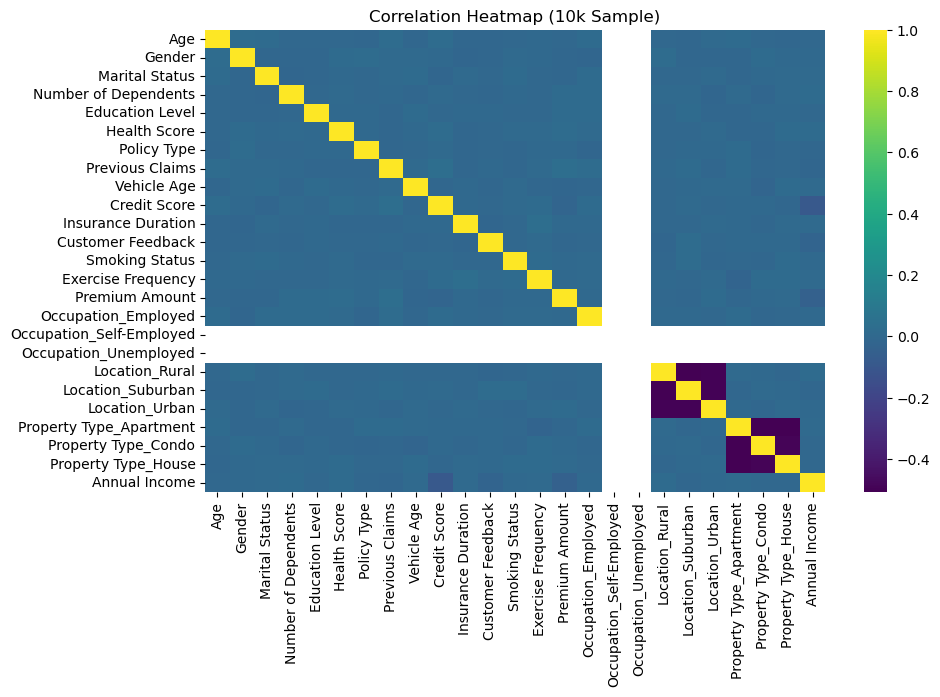

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample 10,000 random rows (preserves correlations)
sample_data = df1.sample(n=10000, random_state=42)

plt.figure(figsize=(10,6))
# Compute correlation matrix for numeric columns only
numeric_sample_data = sample_data#.select_dtypes(include=[np.number])
sns.heatmap(
    numeric_sample_data.corr(), 
    annot=False,  # Skip annotations for speed
    cmap='viridis',
)
plt.title("Correlation Heatmap (10k Sample)")
plt.show()

In [13]:
selected_columns = [
    'Age', 'Gender', 'Marital Status', 'Number of Dependents', 
    'Education Level', 'Health Score', 'Policy Type', 
    'Previous Claims', 'Vehicle Age', 'Credit Score', 
    'Insurance Duration', 'Exercise Frequency', 'Premium Amount', 
    'Annual Income'
]

final_df = df[selected_columns].copy()
final_df.head()

Age  Gender  Marital Status  Number of Dependents  Education Level  \
0  19.0       0               1                   1.0                1   
1  39.0       0               0                   3.0                2   
2  23.0       1               0                   3.0                0   
3  21.0       1               1                   2.0                1   
4  21.0       1               2                   1.0                1   

   Health Score  Policy Type  Previous Claims  Vehicle Age  Credit Score  \
0     22.598761            2              2.0         17.0     372.00000   
1     15.569731            1              1.0         12.0     694.00000   
2     47.177549            2              1.0         14.0     592.92435   
3     10.938144            0              1.0          0.0     367.00000   
4     20.376094            2              0.0          8.0     598.00000   

   Insurance Duration  Exercise Frequency  Premium Amount  Annual Income  
0                 5.0                   1          2869.0       0.789969  
1                 2.0                   2          1483.0       0.896391  
2                 3.0                   1           567.0       0.876652  
3                 1.0                   3           765.0       1.000000  
4                 4.0                   1          2022.0       0.917200

In [ ]:
# Create interaction terms
df['Income_to_CreditRatio'] = df['Annual Income'] / (df['Credit Score'] + 1e-6)
df['Health_Exercise_Interaction'] = df['Health Score'] * df['Exercise Frequency']



In [4]:
low_value_features = [
    'Customer Feedback',  # Near-zero correlation with target
    'Smoking Status',     # Weak correlations throughout
    'Location_Rural'      # Duplicates info from Urban/Suburban
]
df =df.drop(columns=low_value_features)

In [5]:
df

Age  Gender  Marital Status  Number of Dependents  Education Level  \
0        19.0       0               1                   1.0                1   
1        39.0       0               0                   3.0                2   
2        23.0       1               0                   3.0                0   
3        21.0       1               1                   2.0                1   
4        21.0       1               2                   1.0                1   
...       ...     ...             ...                   ...              ...   
1199995  36.0       0               1                   0.0                2   
1199996  54.0       1               0                   3.0                2   
1199997  19.0       1               0                   0.0                2   
1199998  55.0       1               2                   1.0                3   
1199999  21.0       0               0                   0.0                3   

         Health Score  Policy Type  Previous Claims  Vehicle Age  \
0           22.598761            2         2.000000         17.0   
1           15.569731            1         1.000000         12.0   
2           47.177549            2         1.000000         14.0   
3           10.938144            0         1.000000          0.0   
4           20.376094            2         0.000000          8.0   
...               ...          ...              ...          ...   
1199995     13.772907            2         1.002689          5.0   
1199996     11.483482            1         1.002689         10.0   
1199997     14.724469            0         0.000000         19.0   
1199998     18.547381            2         1.000000          7.0   
1199999     10.125323            2         0.000000         18.0   

         Credit Score  ...  Occupation_Unemployed  Location_Suburban  \
0           372.00000  ...                    0.0                0.0   
1           694.00000  ...                    0.0                0.0   
2           592.92435  ...                    0.0                1.0   
3           367.00000  ...                    0.0                0.0   
4           598.00000  ...                    0.0                0.0   
...               ...  ...                    ...                ...   
1199995     372.00000  ...                    0.0                0.0   
1199996     597.00000  ...                    0.0                0.0   
1199997     592.92435  ...                    0.0                1.0   
1199998     407.00000  ...                    0.0                1.0   
1199999     502.00000  ...                    0.0                0.0   

         Location_Urban  Property Type_Apartment  Property Type_Condo  \
0                   1.0                      0.0                  0.0   
1                   0.0                      0.0                  0.0   
2                   0.0                      0.0                  0.0   
3                   0.0                      1.0                  0.0   
4                   0.0                      0.0                  0.0   
...                 ...                      ...                  ...   
1199995             1.0                      1.0                  0.0   
1199996             0.0                      1.0                  0.0   
1199997             0.0                      0.0                  1.0   
1199998             0.0                      1.0                  0.0   
1199999             0.0                      0.0                  0.0   

         Property Type_House  Annual Income  Income_to_CreditRatio  \
0                        1.0       0.789969               0.002124   
1                        1.0       0.896391               0.001292   
2                        1.0       0.876652               0.001479   
3                        0.0       1.000000               0.002725   
4                        1.0       0.917200               0.001534   
...                      ...            ...                    ...   


In [15]:
val = final_df.drop('Premium Amount', axis=1)

tar = final_df['Premium Amount']

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

traindata,testdata,trainlab,testlab = train_test_split(val, tar, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(n_jobs=-1),
    "Decision Tree": DecisionTreeRegressor(max_depth=6, min_samples_split=4, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=60, max_depth=6, min_samples_split=4, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=60, learning_rate=0.05, max_depth=6, objective='reg:squarederror', random_state=42)
}


results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(traindata, trainlab)
    y_pred = model.predict(testdata)
    
    # Compute metrics
    rmsle = np.sqrt(mean_squared_log_error(testlab, np.maximum(y_pred, 0))) 
    rmse = np.sqrt(mean_squared_error(testlab, y_pred))
    r2 = r2_score(testlab, y_pred)
    mae = mean_absolute_error(testlab, y_pred)
    
    results[name] = {"RMSLE": rmsle, "RMSE": rmse, "R²": r2, "MAE": mae}
    
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Select the best model based on RMSE
best_model_name = results_df["RMSE"].idxmin()
print(f"Best performing model: {best_model_name}")


Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...
                      RMSLE        RMSE        R²         MAE
Linear Regression  1.154703  797.438343  0.003940  639.561250
Decision Tree      1.137268  784.200652  0.036735  621.900916
Random Forest      1.137136  783.775866  0.037778  621.819247
XGBoost            1.137650  782.654590  0.040529  622.447379
Best performing model: XGBoost


Fitting 3 folds for each of 256 candidates, totalling 768 fits


c:\Users\gowth\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 768.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gowth\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gowth\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\gowth\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1143, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                         


=== Best Model Performance ===
Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.8}

Metrics:
             RMSLE        RMSE        R2         MAE
Training  1.130829  778.745139  0.051278  617.574947
Test      1.134542  781.542613  0.043254  619.860085


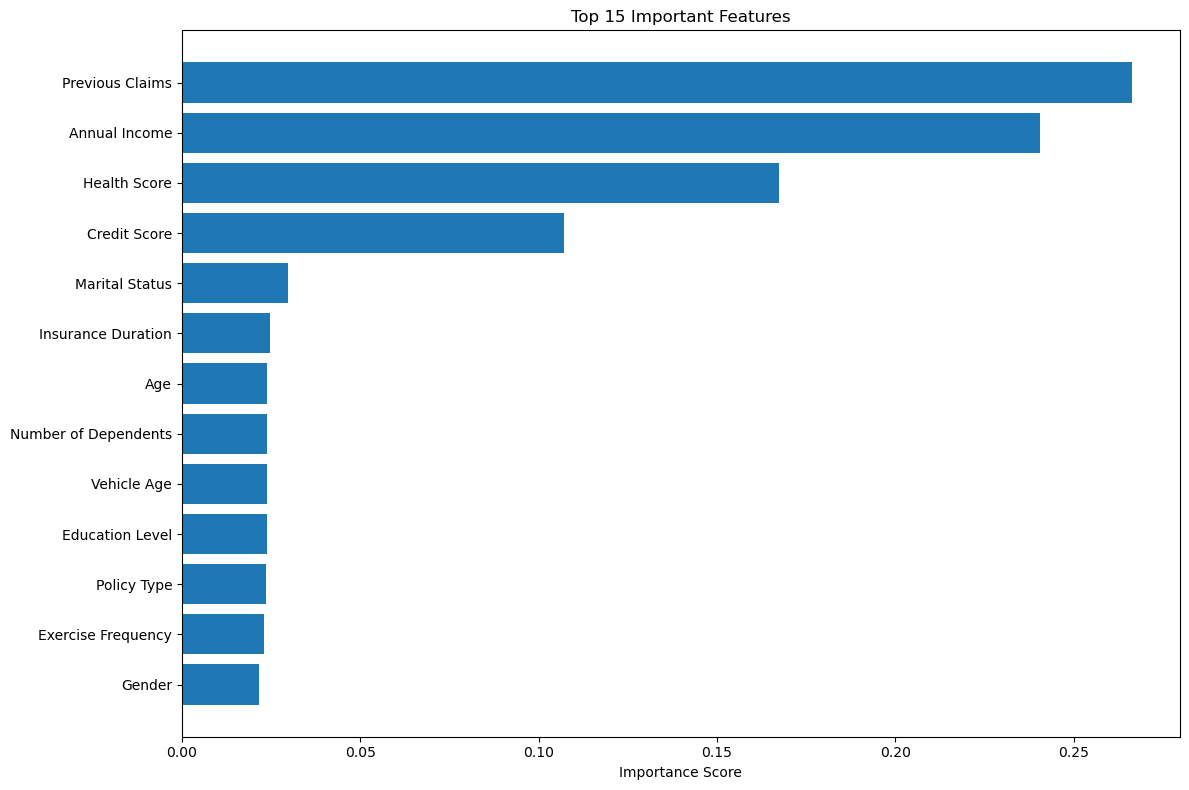

In [19]:

val = final_df.drop('Premium Amount', axis=1)

tar = final_df['Premium Amount']

traindata,testdata,trainlab,testlab = train_test_split(val, tar, test_size=0.2, random_state=42)


import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt

# Custom scoring function for all metrics
def calculate_metrics(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)  # Ensure non-negative for RMSLE
    return {
        'RMSLE': np.sqrt(mean_squared_log_error(y_true, y_pred)),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

# Hyperparameter grid (optimized for regression)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}

# Initialize XGBoost
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Grid search with custom metrics
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=TimeSeriesSplit(n_splits=3),
    scoring='neg_mean_squared_error',  # Primary metric for optimization
    refit=True,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(traindata, trainlab)

# Best model evaluation
best_xgb = grid_search.best_estimator_
y_pred_train = best_xgb.predict(traindata)
y_pred_test = best_xgb.predict(testdata)

# Calculate all metrics
train_metrics = calculate_metrics(trainlab, y_pred_train)
test_metrics = calculate_metrics(testlab, y_pred_test)

# Display results
metrics_df = pd.DataFrame({
    'Training': train_metrics,
    'Test': test_metrics
}).T

print("\n=== Best Model Performance ===")
print(f"Best Parameters: {grid_search.best_params_}")
print("\nMetrics:")
print(metrics_df)

# Feature Importance Plot
plt.figure(figsize=(12, 8))
sorted_idx = best_xgb.feature_importances_.argsort()
plt.barh(traindata.columns[sorted_idx][-15:], best_xgb.feature_importances_[sorted_idx][-15:])
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [20]:
import pickle

# Save the trained model as a pickle file
with open("xgb_model.pkl", "wb") as model_file:
    pickle.dump(best_xgb, model_file)

print("Model saved as xgb_model.pkl")

Model saved as xgb_model.pkl


In [ ]:
import pickle

with open("xgb_premium_model.pkl", "wb") as model_file:
    pickle.dump(best_xgb_model, model_file)

print("Model saved as xgb_premium_model.pkl")

In [15]:
data = pd.read_csv('train_preprocessed.csv')

In [16]:
X = data.drop('Premium Amount', axis = 1)
Y = data['Premium Amount']

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:

models = {
    "Linear Regression": LinearRegression(n_jobs=-1),
    "Decision Tree": DecisionTreeRegressor(max_depth=6, min_samples_split=4, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=60, max_depth=6, min_samples_split=4, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=60, learning_rate=0.05, max_depth=6, objective='reg:squarederror', random_state=42)
}


results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute metrics
    rmsle = np.sqrt(mean_squared_log_error(y_test, np.maximum(y_pred, 0))) 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {"RMSLE": rmsle, "RMSE": rmse, "R²": r2, "MAE": mae}
    
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Select the best model based on RMSE
best_model_name = results_df["RMSE"].idxmin()
print(f"Best performing model: {best_model_name}")


Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...
                      RMSLE        RMSE        R²         MAE
Linear Regression  1.154709  797.434603  0.003949  639.557559
Decision Tree      1.137185  784.152855  0.036852  621.869672
Random Forest      1.137046  783.717655  0.037921  621.776884
XGBoost            1.137713  782.546338  0.040795  622.412352
Best performing model: XGBoost


##### XGBoost

In [23]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:

import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score

# Load Training Data
train_data = pd.read_csv("train_preprocessed.csv")
# Use a smaller subset of the data for hyperparameter tuning
train_sample = train_data.sample(frac=0.1, random_state=42)  # Use 10% of the data
X_train = train_sample.drop(columns=["Premium Amount"])
y_train = train_sample["Premium Amount"]


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    random_state=42, 
    tree_method='hist'  
)

# Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0, 0.1] 
}

grid_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20, 
    scoring='neg_root_mean_squared_error',
    cv=3, 
    verbose=1,
    n_jobs=-1,
    random_state=42 
)


grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred_train = best_xgb_model.predict(X_train)

rmsle = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"RMSLE: {rmsle}, MAE: {mae}, RMSE: {rmse}, R²: {r2}")


try:
    X_test = pd.read_csv("test_preprocessed.csv")
    y_pred_test = best_xgb_model.predict(X_test)
    pd.DataFrame({"predicted_premium_amount": y_pred_test}).to_csv("predicted_premiums.csv", index=False)
except FileNotFoundError:
    print("Test data not found. Skipping test predictions.")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
RMSLE: 1.1290076027348568, MAE: 614.0077309463501, RMSE: 772.1628583059012, R²: 0.06325386431774305


In [103]:
import pickle

# Save the trained model as a pickle file
with open("xgb_premium_model.pkl", "wb") as model_file:
    pickle.dump(best_xgb_model, model_file)

print("Model saved as xgb_premium_model.pkl")


Model saved as xgb_premium_model.pkl


## ML PIPELINE

In [69]:
from sklearn.pipeline import Pipeline

In [104]:
pipeline = Pipeline([
    ('model', XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=1.0,
        gamma=0,
        random_state=42,
        tree_method='hist'
    ))
])

In [105]:
pipeline

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [128]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [129]:
pipeline_prediction = pipeline.predict(X_test)

In [130]:
pipeline_prediction

array([1136.5892, 1250.0819, 1119.9781, ..., 1072.6387, 1301.338 ,
       1050.1462], dtype=float32)

In [132]:

# Calculate metrics
pipeline.rmsle = np.sqrt(mean_squared_log_error(y_test, pipeline_prediction))
pipeline.mae = mean_absolute_error(y_test, pipeline_prediction)
pipeline.rmse = np.sqrt(mean_squared_error(y_test, pipeline_prediction))
pipeline.r2 = r2_score(y_test, pipeline_prediction)

In [133]:
print(f"RMSLE: {pipeline.rmsle}")
print(f"MAE: {pipeline.mae}")  
print(f"RMSE: {pipeline.rmse}")
print(f"R²: {pipeline.r2}")

RMSLE: 1.1355855314709302
MAE: 621.5537471090953
RMSE: 782.4468932046858
R²: 0.04103844789608657


## ML Flow

In [134]:
# EXPERIEMENT TRACKING
import mlflow
import mlflow.sklearn

In [135]:
mlflow.log_param('model_name', 'XGBoost')

'XGBoost'

In [137]:
mlflow.log_metric('RMSLE', pipeline.rmsle)
mlflow.log_metric('MAE', pipeline.mae)
mlflow.log_metric('RMSE', pipeline.rmse)
mlflow.log_metric('R²', pipeline.r2)

In [138]:
input_example = X_train.iloc[:1]
mlflow.sklearn.log_model(pipeline, "xgb_model", input_example=input_example)

In [139]:
print("XGBoost Pipeline Results:")
print(f"RMSLE: {pipeline.rmsle}\\nMAE: {pipeline.mae}\\nRMSE: {pipeline.rmse}\\nR²: {pipeline.r2}")

XGBoost Pipeline Results:
RMSLE: 1.1355855314709302\nMAE: 621.5537471090953\nRMSE: 782.4468932046858\nR²: 0.04103844789608657
